# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama : Astri Nur Innayah
- Email : skripsiastri1@gmail.com
- ID Dicoding : A406XBM074

# **Persiapan**

## **Menyiapkan Library yang dibutuhkan**

Bagian ini berguna untuk menginstall dan mengimport semua library yang dibutuhkan

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

from google.colab import files

## **Menyiapkan Data yang akan digunakan**

Bagian ini berguna untuk mengimport data yang akan digunakan dalam pembangunan model

In [2]:
# https://docs.google.com/spreadsheets/d/1kct_04tV9dBTMRT1DldpI0hDXcWg6I3AVW5TAZb7I9o/edit?gid=665015379#gid=665015379
file_id = '1kct_04tV9dBTMRT1DldpI0hDXcWg6I3AVW5TAZb7I9o'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Dataset.xlsx'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1kct_04tV9dBTMRT1DldpI0hDXcWg6I3AVW5TAZb7I9o
From (redirected): https://docs.google.com/spreadsheets/d/1kct_04tV9dBTMRT1DldpI0hDXcWg6I3AVW5TAZb7I9o/export?format=xlsx
To: /content/Dataset.xlsx
211kB [00:00, 2.66MB/s]


'Dataset.xlsx'

In [3]:
df = pd.read_excel('Dataset.xlsx')
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## **Data Preparation**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Data ini berisi rincian demografi, metrik yang berkaitan dengan pekerjaan, dan status pengunduran diri (attrition).

* **EmployeeId** - Identifikasi Karyawan
* **Attrition** - Apakah karyawan mengundurkan diri? (0=tidak, 1=ya)
* **Age** - Usia karyawan
* **BusinessTravel** - Komitmen perjalanan untuk pekerjaan
* **DailyRate** - Gaji per hari
* **Department** - Departemen tempat karyawan bekerja
* **DistanceFromHome** - Jarak dari rumah ke tempat kerja (dalam km)
* **Education** - 1-Di bawah perguruan tinggi, 2-Perguruan tinggi, 3-Sarjana, 4-Magister, 5-Doctor
* **EducationField** - Bidang Pendidikan
* **EmployeeCount**
* **EnvironmentSatisfaction** - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
* **Gender** - Jenis kelamin karyawan
* **HourlyRate** - Gaji per jam
* **JobInvolvement** - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
* **JobLevel** - Tingkat pekerjaan (1 hingga 5)
* **JobRole** - Peran pekerjaan
* **JobSatisfaction** - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
* **MaritalStatus** - Status perkawinan
* **MonthlyIncome** - Gaji bulanan
* **MonthlyRate** - Tarif bulanan
* **NumCompaniesWorked** - Jumlah perusahaan yang pernah bekerja
* **Over18** - Apakah karyawan berusia lebih dari 18 tahun?
* **OverTime** - Apakah karyawan bekerja lembur?
* **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu
* **PerformanceRating** - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Terbuka
* **RelationshipSatisfaction** - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
* **StandardHours** - Jam kerja standar
* **StockOptionLevel** - Tingkat Opsi Saham
* **TotalWorkingYears** - Total tahun bekerja
* **TrainingTimesLastYear** - Jumlah pelatihan yang diikuti tahun lalu
* **WorkLifeBalance** - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Terbuka
* **YearsAtCompany** - Tahun bekerja di perusahaan
* **YearsInCurrentRole** - Tahun di peran saat ini
* **YearsSinceLastPromotion** - Tahun sejak promosi terakhir
* **YearsWithCurrManager** - Tahun bersama manajer saat ini


### **Cek nilai unik untuk tiap variabel kategorik**

Bagian ini untuk melihat kategori setiap variabel kategorik

In [5]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Department
['Human Resources' 'Research & Development' 'Sales'] 

EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender
['Male' 'Female'] 

JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

MaritalStatus
['Married' 'Single' 'Divorced'] 

Over18
['Y'] 

OverTime
['Yes' 'No'] 



### **Melihat Statistik Deskriptif untuk semua variabel**

In [6]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Berdasarkan analisis statistik deskriptif, semua karyawan berusia di atas 18 tahun, yang dapat dilihat pada fitur unik `Over18` yang hanya memiliki 1 data, yaitu `Y`. Selain itu, fitur `EmployeeCount` juga hanya memiliki 1 nilai unik. Oleh karena itu, kita dapat mengeliminasi kedua fitur ini karena tidak memiliki pengaruh besar terhadap masalah bisnis.


Berdasarkan analisis statistik deskriptif, semua karyawan berusia di atas 18 tahun, yang dapat dilihat pada fitur unik `Over18` yang hanya memiliki 1 data, yaitu `Y`. Selain itu, fitur `EmployeeCount` juga hanya memiliki 1 nilai unik. Oleh karena itu, kita dapat mengeliminasi kedua fitur ini karena tidak memiliki pengaruh besar terhadap masalah bisnis.


In [8]:
df = df.drop(['Over18', 'EmployeeCount'], axis=1)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


### **Penanganan Missing Value dan Data Duplikat**

In [9]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


Terlihat bahwa dataset memiliki beberapa nilai yang hilang pada fitur `Attrition`, yang merupakan fitur utama dalam masalah bisnis yang akan diselesaikan, kita perlu menghapus data dengan nilai yang hilang tersebut.


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


Selanjutnya dilakukan pengecekkan duplikasi data

In [11]:
df.duplicated().sum()

np.int64(0)

Hasilnya, tidak terdapat data yang duplikat

### **Decoding Variabel Kategorik**

Decoding Ordinal untuk fitur-fitur berikut  :

* **Education**:

  * 1: Below College
  * 2: College
  * 3: Bachelor
  * 4: Master
  * 5: Doctor

* **EnvironmentSatisfaction**:

  * 1: Low
  * 2: Medium
  * 3: High
  * 4: Very High

* **JobInvolvement**:

  * 1: Low
  * 2: Medium
  * 3: High
  * 4: Very High

* **JobSatisfaction**:

  * 1: Low
  * 2: Medium
  * 3: High
  * 4: Very High

* **PerformanceRating**:

  * 1: Low
  * 2: Good
  * 3: Excellent
  * 4: Outstanding

* **RelationshipSatisfaction**:

  * 1: Low
  * 2: Medium
  * 3: High
  * 4: Very High

* **WorkLifeBalance**:

  * 1: Low
  * 2: Good
  * 3: Excellent
  * 4: Outstanding


In [12]:
def ordinal_decoding(df, feature):
    """
    Convert encoded feature in a DataFrame to corresponding categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame with feature(s) to be converted
        feature (str or list of str) : The feature name(s) to convert

    Returns
        pandas.DataFrame : The DataFrame with feature(s) as categorical labels
    """

    if feature == 'Attrition':
        category = {0: 'No', 1: 'Yes'}
        df[feature] = df[feature].map(category)
    elif feature == 'Education':
        category = {1: 'Below College', 2: 'College', 3: 'Bachelor',
                    4: 'Master', 5: 'Doctor'}
        df[feature] = df[feature].map(category)
    elif feature in ['WorkLifeBalance', 'PerformanceRating']:
        category = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
        df[feature] = df[feature].map(category)
    else:
        category = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
        for f in feature:
            df[f] = df[f].map(category)

    return df

In [13]:
df = ordinal_decoding(df, 'Attrition')
df = ordinal_decoding(df, 'Education')
df = ordinal_decoding(df, ['EnvironmentSatisfaction', 'JobInvolvement',
                           'JobSatisfaction', 'RelationshipSatisfaction'])
df = ordinal_decoding(df, ['PerformanceRating', 'WorkLifeBalance'])

df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Low,80,0,10,2,Medium,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Medium,80,1,6,0,High,4,2,0,0


# **Data Understanding**

Melihat statistik deskriptif untuk semua variabel

In [14]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058,1058.000000,1058,1058.000000,1058,1058,1058,...,1058,1058.0,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,2,3,NaN,3,NaN,5,6,4,...,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,Bachelor,Life Sciences,High,...,High,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN
freq,NaN,NaN,879,746,NaN,701,NaN,410,436,335,...,324,NaN,NaN,NaN,NaN,638,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,NaN,NaN,809.542533,NaN,8.978261,NaN,NaN,NaN,...,NaN,80.0,0.762760,11.435728,2.769376,NaN,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,NaN,NaN,408.478049,NaN,8.040608,NaN,NaN,NaN,...,NaN,0.0,0.837537,8.016429,1.302689,NaN,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,NaN,NaN,465.250000,NaN,2.000000,NaN,NaN,NaN,...,NaN,80.0,0.000000,6.000000,2.000000,NaN,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,NaN,NaN,817.500000,NaN,7.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,10.000000,3.000000,NaN,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,NaN,NaN,1168.500000,NaN,13.000000,NaN,NaN,NaN,...,NaN,80.0,1.000000,16.000000,3.000000,NaN,9.000000,7.00000,3.000000,7.000000


## **Analisis Distribusi pada kelas target**

In [15]:
# Distribusi variabel target (Attrition)
attrition_counts = df['Attrition'].value_counts()
attrition_counts

,count
Attrition,
No,879
Yes,179


In [16]:
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100
attrition_percentage

,proportion
Attrition,
No,83.081285
Yes,16.918715


**Distribusi Target (`Attrition`)**
- No (Tidak Keluar): 83.08%
- Yes (Keluar): 16.92%

  Artinya, sebagian besar karyawan tidak keluar, tetapi `Attrition` tetap signifikan pada **16.92%** karyawan.

## **Analisis Fitur Numerik**

In [17]:
numerical, categorical = [], []

for feature in df.columns:
    if not df[feature].dtype == 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [18]:
numerical_description = df[numerical].describe()
numerical_description

,EmployeeId,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,809.542533,8.978261,65.643667,2.090737,6625.945180,14267.281664,2.706994,15.155955,80.0,0.762760,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,408.478049,8.040608,20.324861,1.136514,4837.695042,7048.077305,2.523526,3.641097,0.0,0.837537,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,465.250000,2.000000,48.000000,1.000000,2900.250000,8277.250000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,817.500000,7.000000,65.000000,2.000000,4903.500000,14201.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,1168.500000,13.000000,83.000000,3.000000,8736.500000,20364.000000,4.000000,18.000000,80.0,1.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


**Deskripsi Kolom Numerik**
- `Age`: Rata-rata usia adalah 37 tahun.
- `DistanceFromHome`: Sebagian besar karyawan tinggal dekat dengan kantor (jarak rata-rata 9 km).
- `YearsAtCompany`: Sebagian besar karyawan bekerja di perusahaan selama 5-9 tahun.

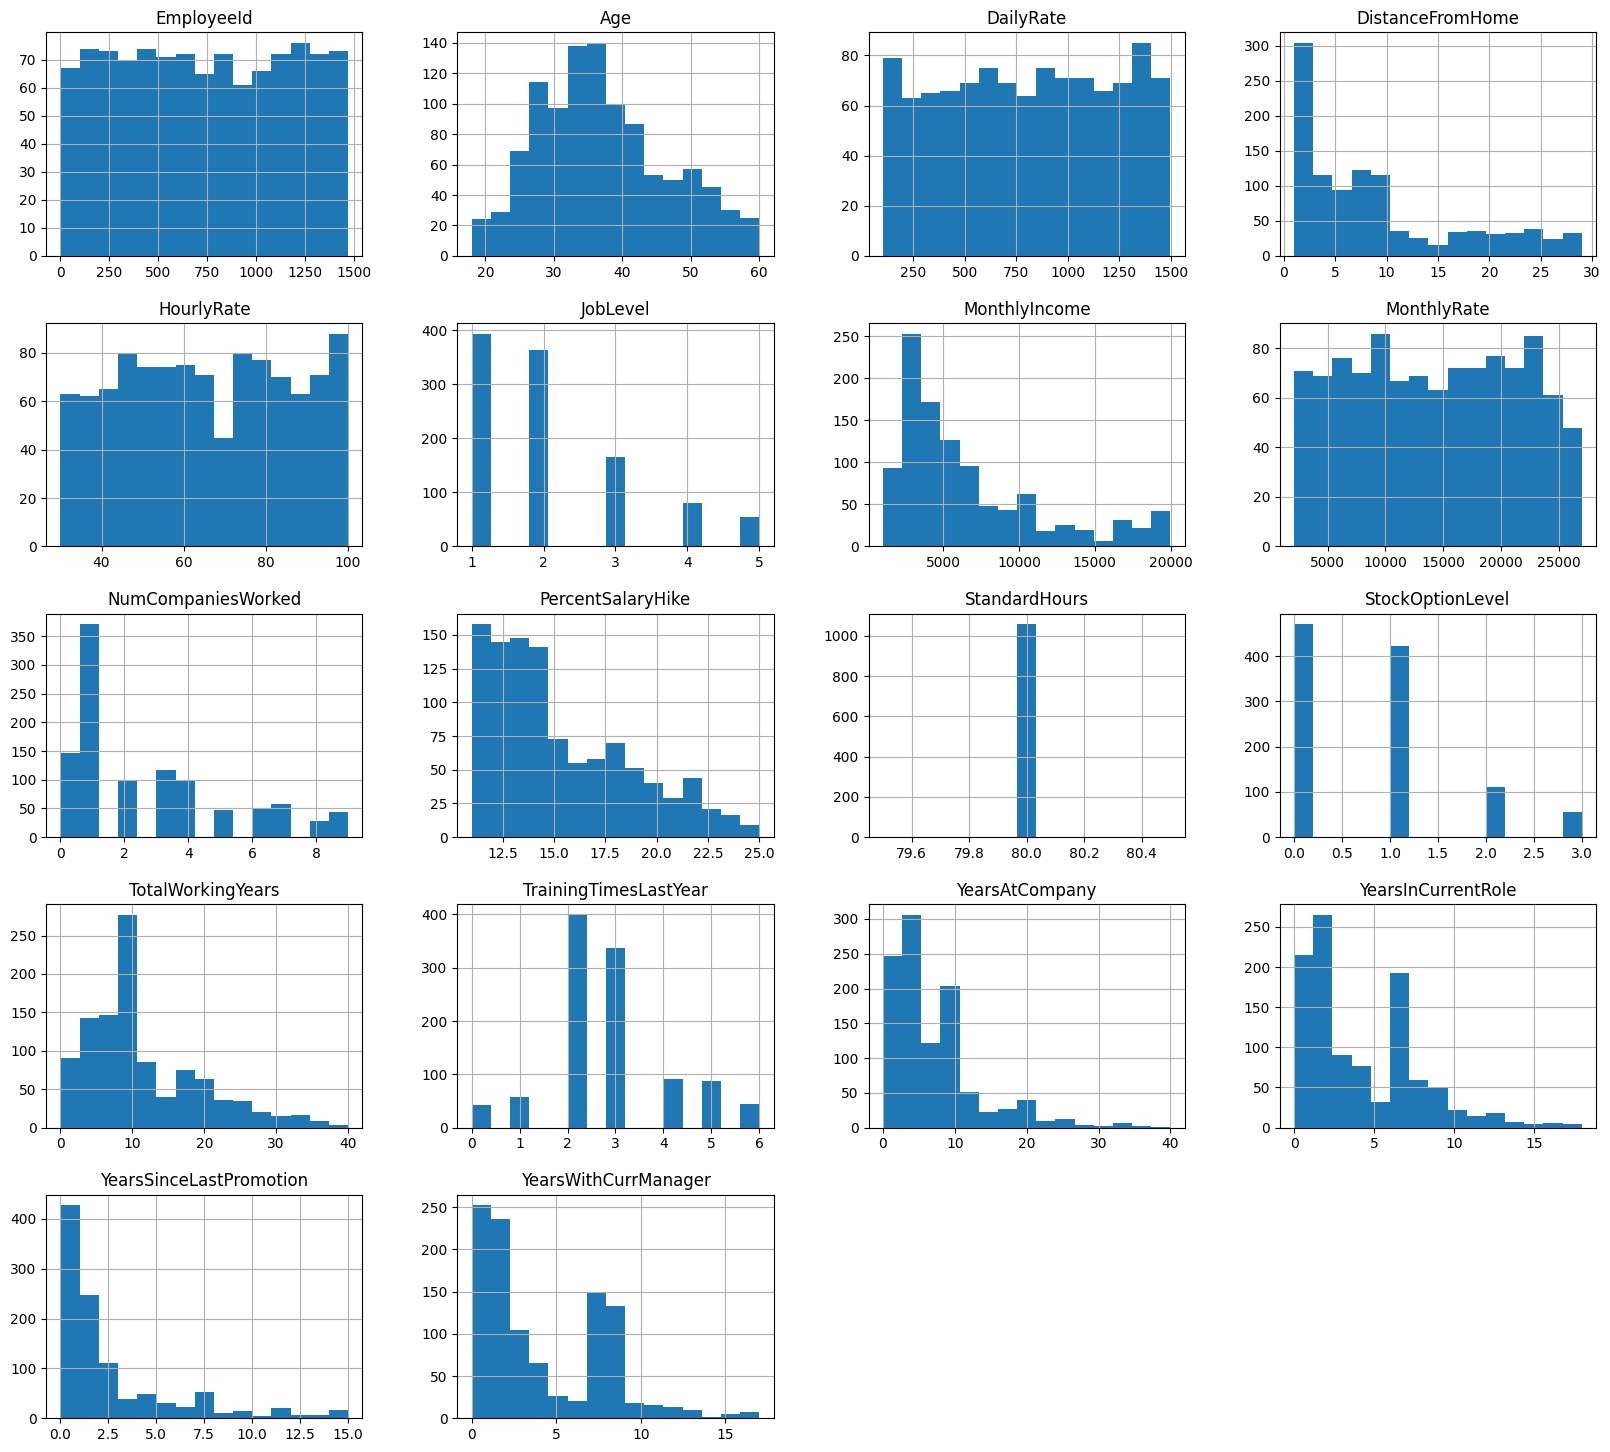

In [19]:
df[numerical].hist(bins=15, figsize=(20, 18))
plt.show()

Berdasarkan grafik histogram di atas, sebagian besar fitur numerik menunjukkan distribusi yang condong ke kanan (right-skewed). Fitur-fitur tersebut antara lain `DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`. Hal ini mengindikasikan bahwa sebagian besar nilai berada pada kisaran rendah, sementara hanya sedikit data yang memiliki nilai tinggi. Sementara itu, fitur seperti `Age` dan `TrainingTimesLastYear` memiliki distribusi yang lebih simetris atau mendekati normal, mencerminkan sebaran nilai yang relatif seimbang di sekitar rata-rata. Beberapa fitur lain seperti `EmployeeID`, `DailyRate`, `HourlyRate`, dan `MonthlyRate` tampak tersebar merata tanpa pola distribusi khusus. Selain itu, terdapat fitur seperti `StandardHours` yang tidak memiliki variasi sama sekali, sehingga kemungkinan tidak memberikan kontribusi informasi dalam proses pemodelan selanjutnya.


### **Analisis Hubungan Fitur Numerik terhadap target**

Menggunakan visualisasi, kita dapat melihat hubungan fitur numerik terhadap `Attrition`

<ipython-input-20-3821842485>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette="Set2")


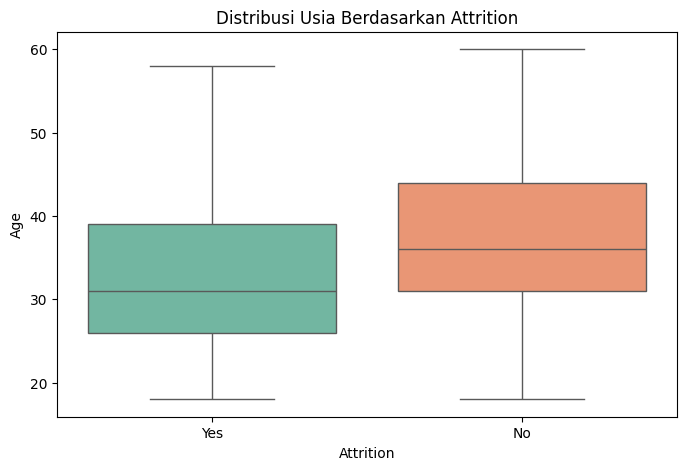

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='Age', palette="Set2")
plt.title("Distribusi Usia Berdasarkan Attrition")
plt.show()

<ipython-input-21-20385211>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="Set2")


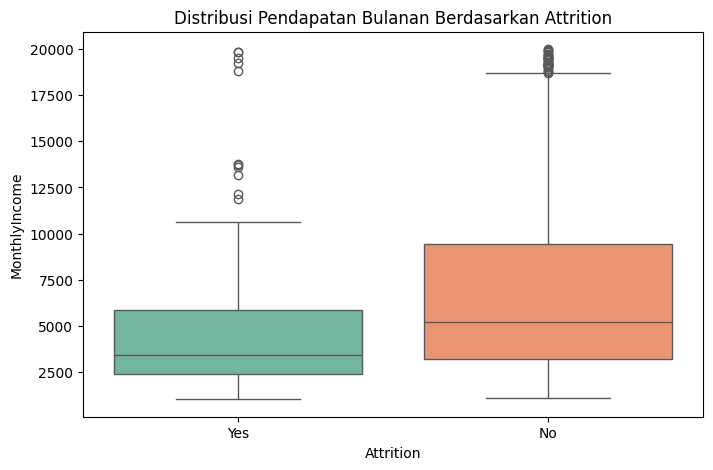

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="Set2")
plt.title("Distribusi Pendapatan Bulanan Berdasarkan Attrition")
plt.show()

<ipython-input-22-3791131543>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette="Set2")


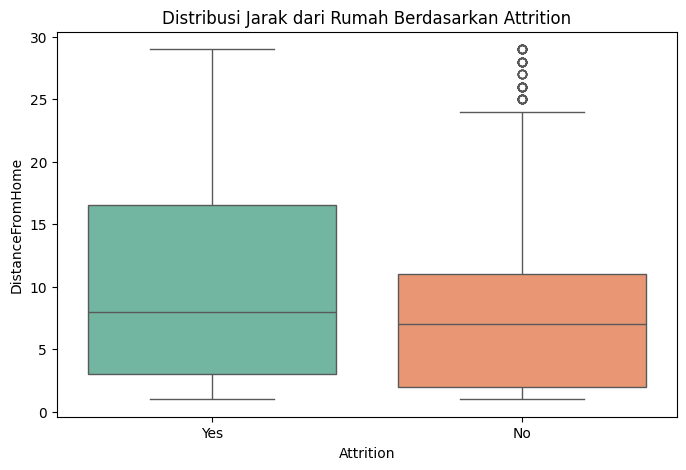

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette="Set2")
plt.title("Distribusi Jarak dari Rumah Berdasarkan Attrition")
plt.show()

**Hasil Analisis Fitur Numerik**
  - Kolom `Age`: Karyawan dengan `Attrition` cenderung lebih muda dibandingkan karyawan yang tidak keluar.
  - Kolom `MonthlyIncome`: Karyawan dengan `Attrition` memiliki distribusi pendapatan yang lebih rendah dibandingkan karyawan yang bertahan.
  - `DistanceFromHome`: Tidak ada perbedaan signifikan dalam jarak rumah terhadap kantor antara karyawan yang keluar dan yang bertahan.

### **Distribusi YearsAtCompany dan TotalWorkingYears**

Menganalisis distribusi kolom `YearsAtCompany` dan `TotalWorkingYears` karena fitur ini relevan dalam memengaruhi `Attrition`

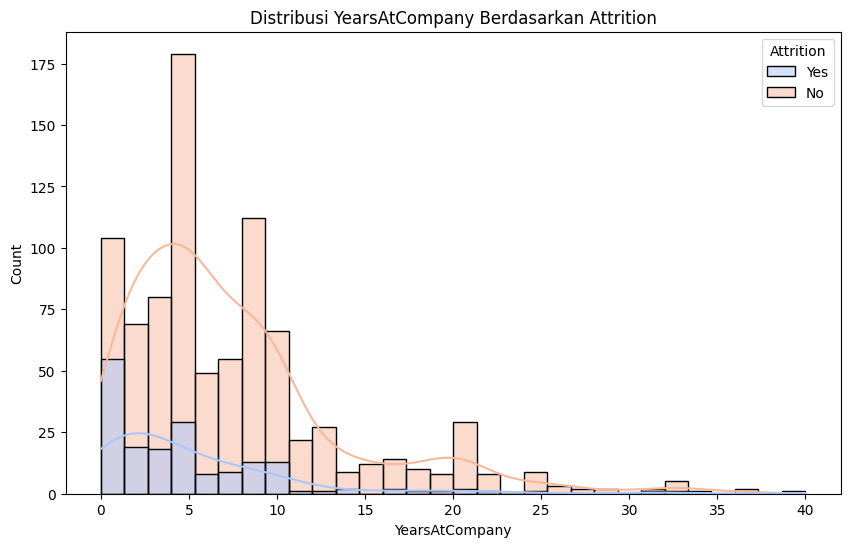

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="YearsAtCompany", hue="Attrition", kde=True, palette="coolwarm", bins=30)
plt.title("Distribusi YearsAtCompany Berdasarkan Attrition")
plt.xlabel("YearsAtCompany")
plt.ylabel("Count")
plt.show()

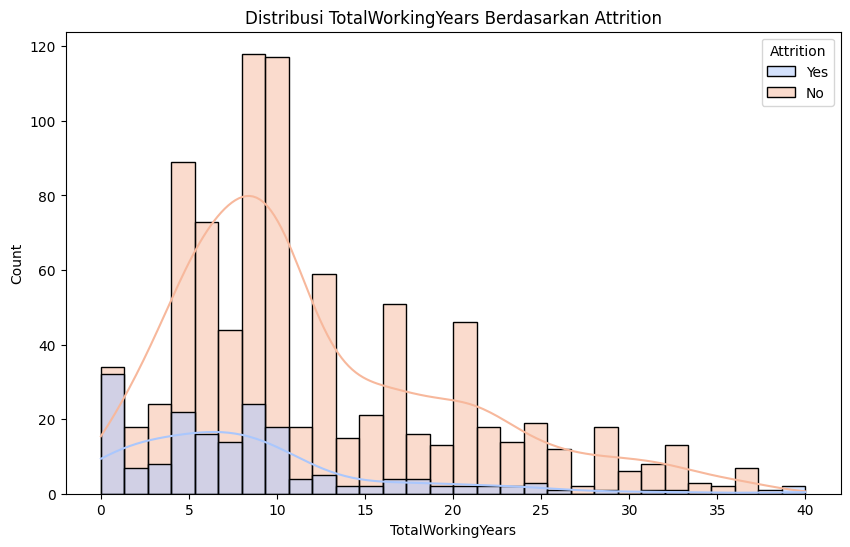

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="TotalWorkingYears", hue="Attrition", kde=True, palette="coolwarm", bins=30)
plt.title("Distribusi TotalWorkingYears Berdasarkan Attrition")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Count")
plt.show()

Berdasarkan distribusi kolom `YearsAtCompany` dan `TotalWorkingYears` terhadap `Attrition`:
1. `YearsAtCompany`:
  - Karyawan dengan masa kerja singkat (sekitar 0-5 tahun) memiliki risiko `Attrition` lebih tinggi.
  - Distribusi menunjukkan bahwa karyawan baru cenderung keluar lebih cepat.

2. `TotalWorkingYears`:
  - Karyawan dengan pengalaman kerja lebih sedikit (0-10 tahun) lebih sering keluar dibandingkan yang memiliki pengalaman kerja lebih panjang.
  - Ini menunjukkan pentingnya retensi awal karir dan pengembangan karyawan.

### **Analisis Interaksi Antar Fitur**

Bagian ini digunakan untuk melihat hubungan antara dua fitur utama dan bagaimana mereka berinteraksi dengan target `Attrition`

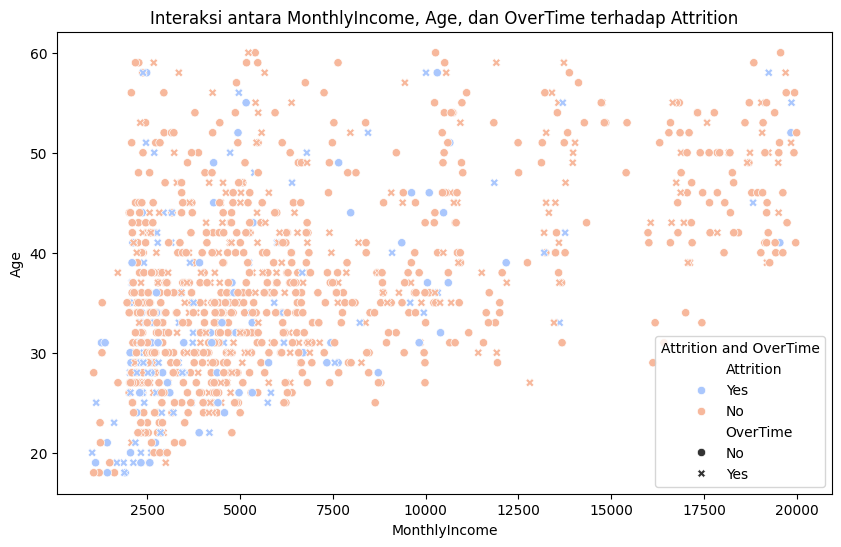

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition", style="OverTime", palette="coolwarm")
plt.title("Interaksi antara MonthlyIncome, Age, dan OverTime terhadap Attrition")
plt.xlabel("MonthlyIncome")
plt.ylabel("Age")
plt.legend(title="Attrition and OverTime")
plt.show()

Grafik di atas menunjukkan hubungan antara kolom `MonthlyIncome`, `Age`, dan `Overtime` dengan `Attrition`.

1. `Attrition` dan `Overtime`

   * Karyawan yang sering lembur (ditandai dengan simbol \*) cenderung lebih sering mengalami attrition (ditandai dengan warna biru) dibandingkan dengan yang tidak lembur.
2. `Attrition` dan `MonthlyIncome`

   * Karyawan dengan pendapatan bulanan yang lebih rendah memiliki tingkat attrition yang lebih tinggi dibandingkan dengan karyawan yang berpendapatan lebih tinggi.
   * Hal ini terlihat dari kepadatan titik biru yang lebih banyak di sisi kiri grafik (pendapatan bulanan rendah).
3. `Attrition` dan `Age`

   * Karyawan yang lebih muda cenderung mengalami attrition lebih sering, terlihat dari konsentrasi titik oranye di bagian bawah grafik (usia rendah).
4. Interaksi Antara Ketiga Variabel

   * Karyawan yang muda, berpendapatan rendah, dan sering lembur memiliki kecenderungan attrition yang lebih tinggi.


### **Hubungan Fitur Kategorik terhadap Target**

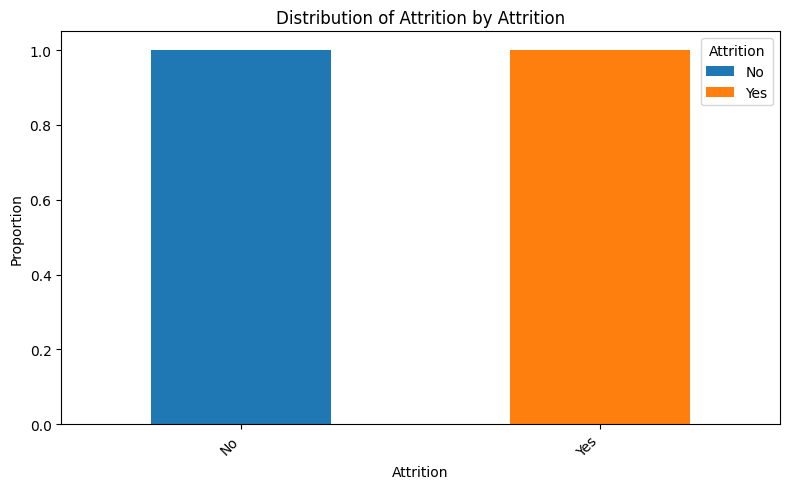

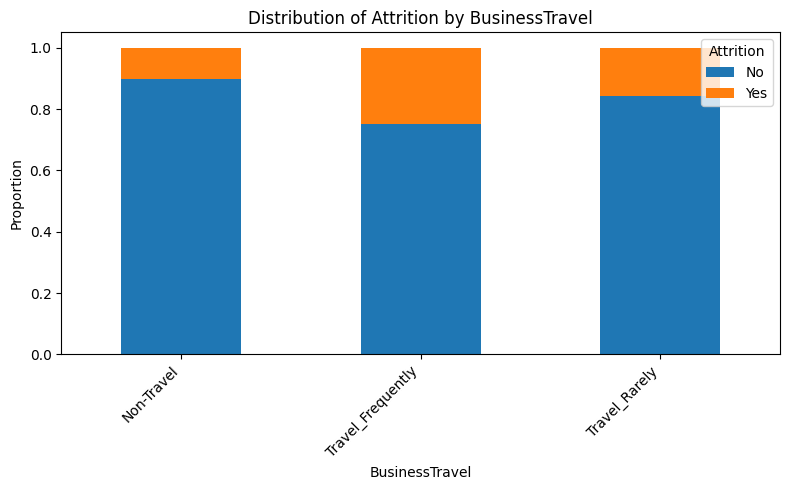

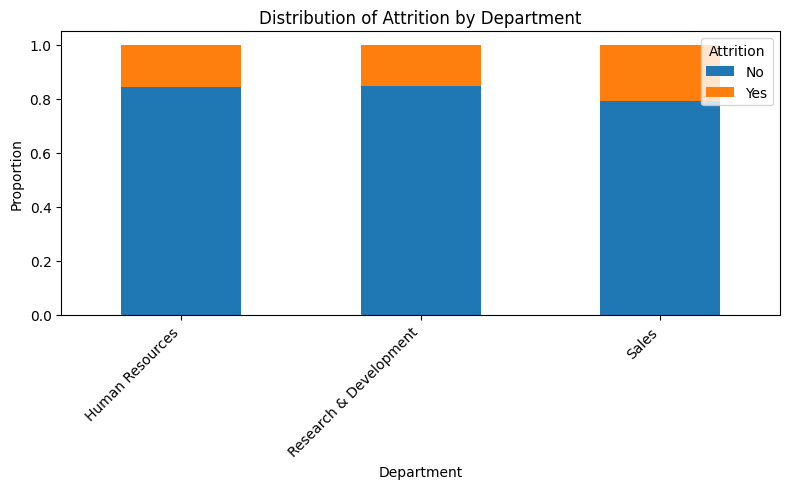

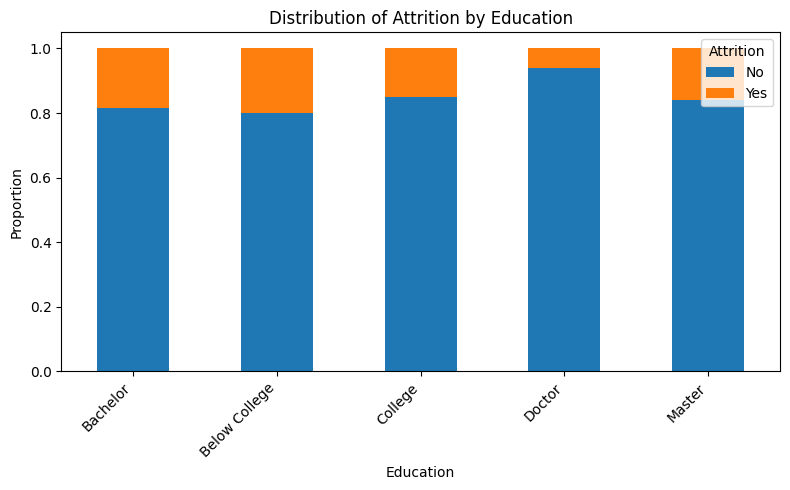

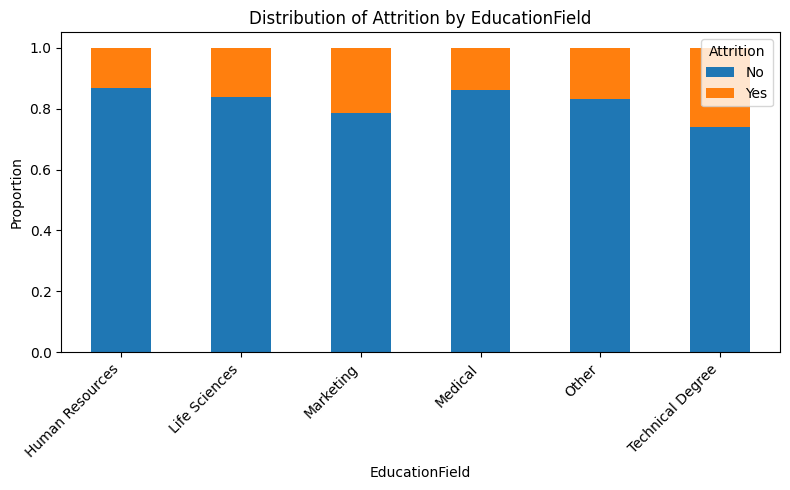

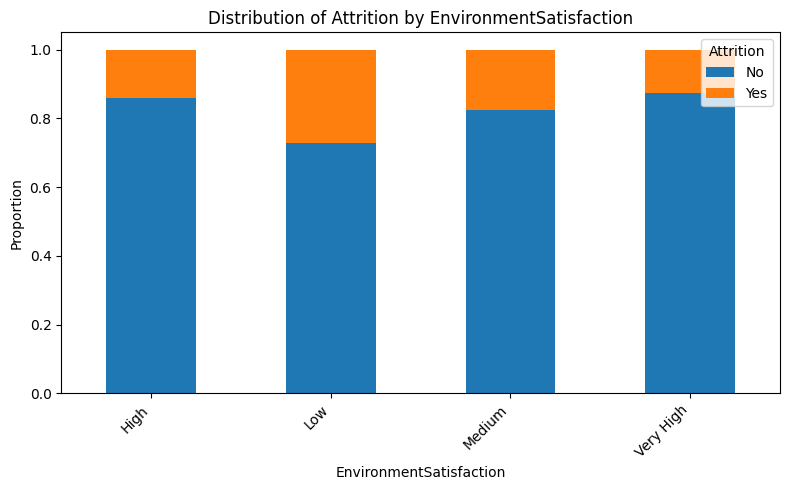

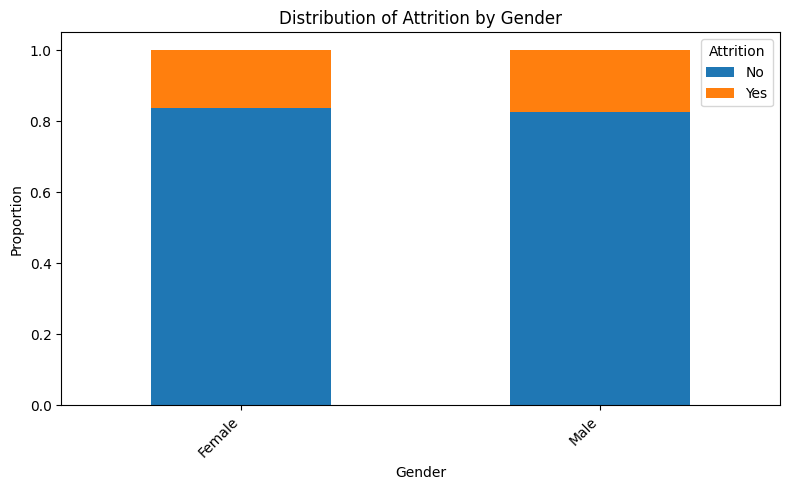

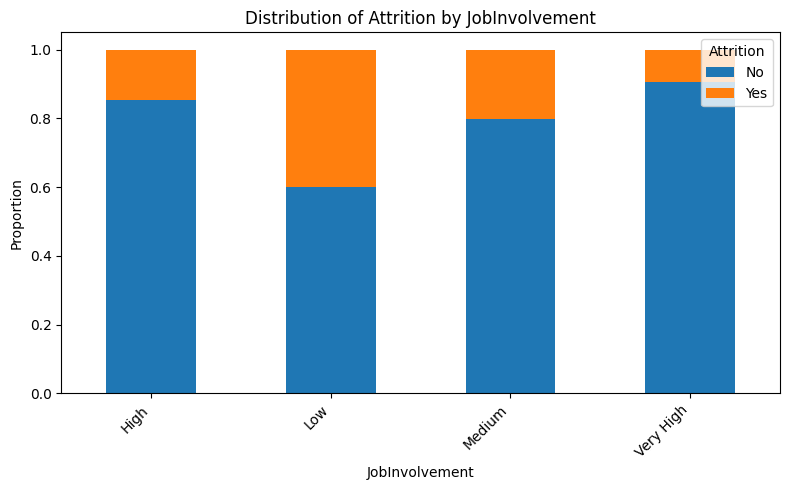

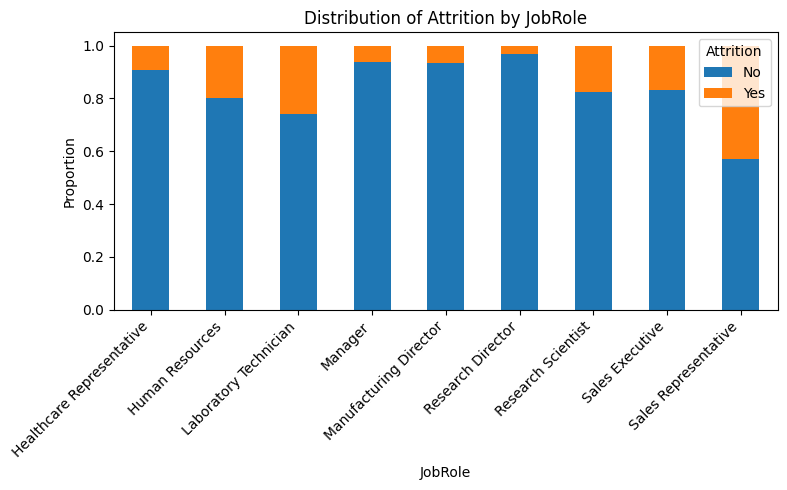

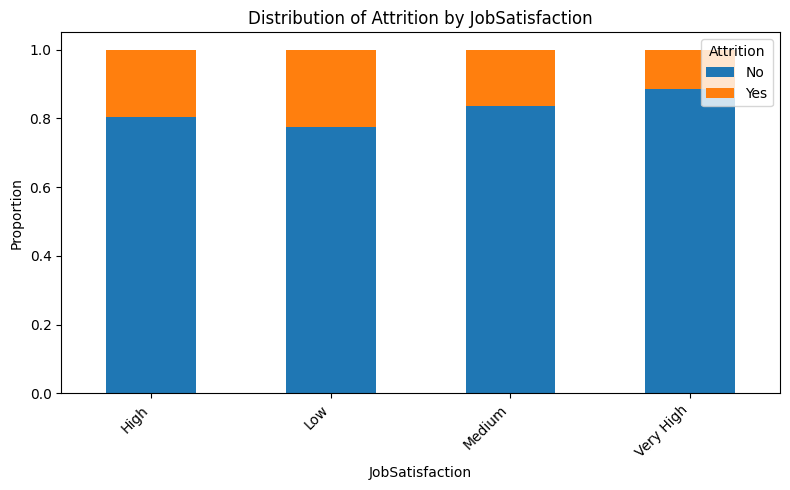

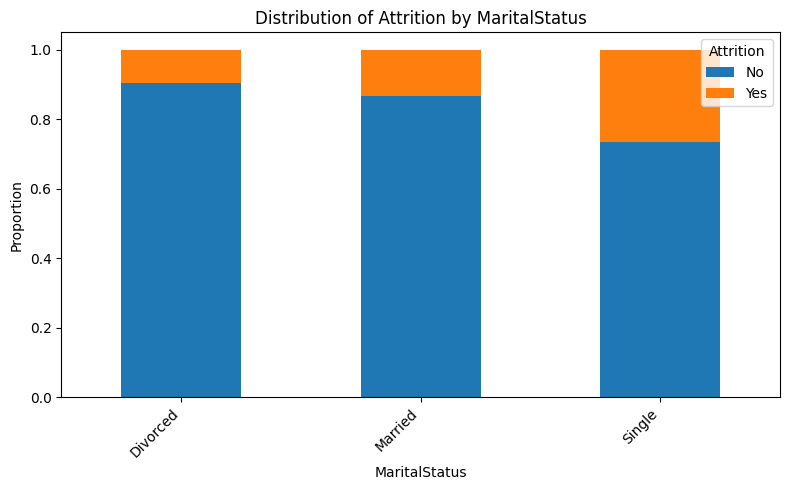

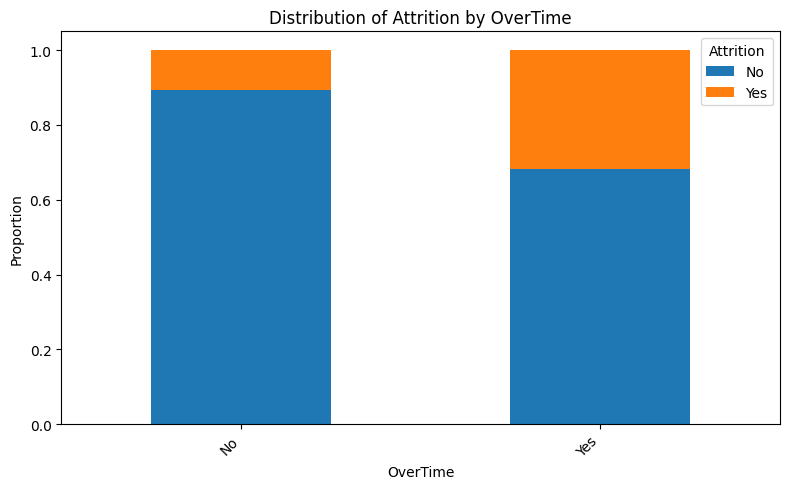

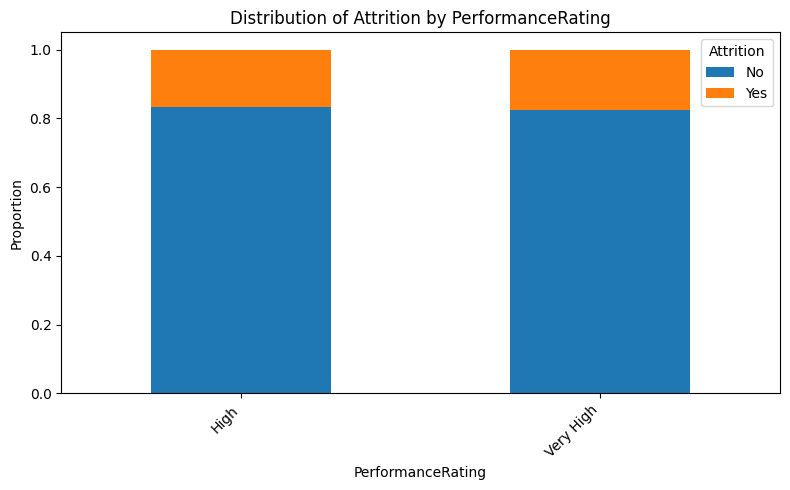

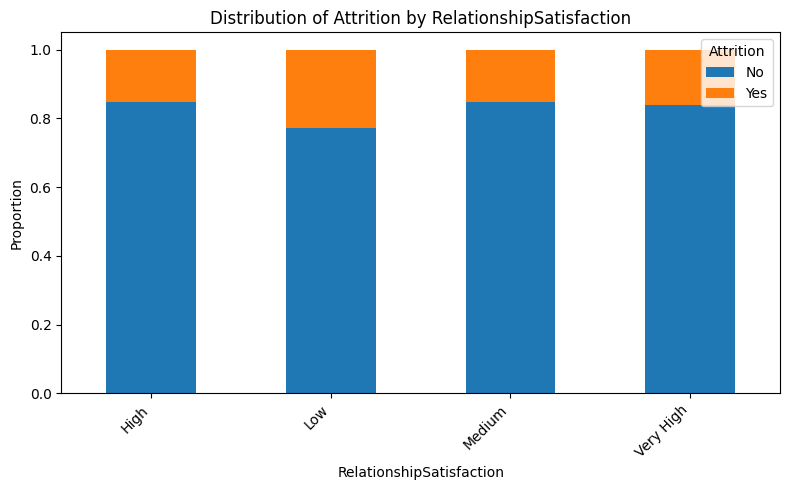

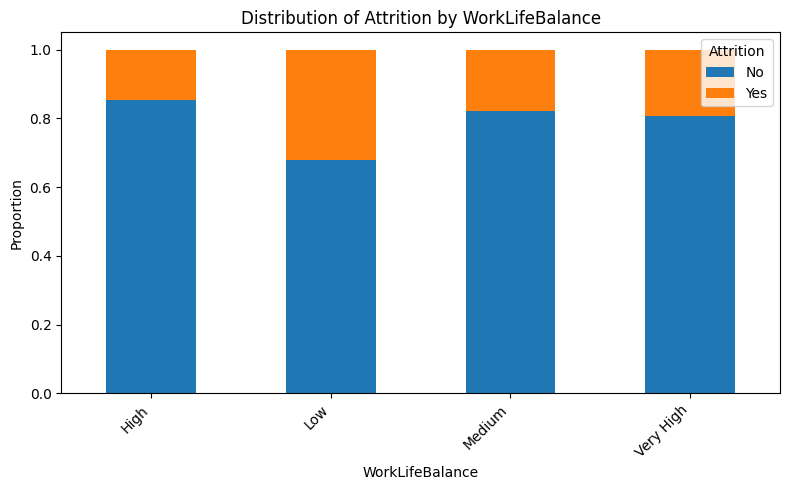

In [26]:
for feature in categorical:
    contingency_table = pd.crosstab(df[feature], df['Attrition'])
    contingency_table.div(contingency_table.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f"Distribution of Attrition by {feature}")
    plt.ylabel("Proportion")
    plt.xlabel(feature)
    plt.legend(title="Attrition", loc="upper right")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

Dari stacked bar chart, beberapa insight yang kita diperoleh:
1. **OverTime**: Karyawan yang sering lembur (OverTime = Yes) memiliki proporsi attrition yang jauh lebih tinggi.
2. **MaritalStatus**: Karyawan single lebih rentan keluar dibandingkan yang sudah menikah atau bercerai.
3. **JobRole**: Beberapa peran, seperti **Sales Representative** dan **Laboratory Technician**, memiliki attrition yang tinggi.
4. **BusinessTravel**: Karyawan yang sering melakukan perjalanan bisnis memiliki risiko keluar lebih tinggi dibandingkan kategori lainnya.

### **Menggunakan Chi-Square Test**

In [30]:
categorical = [feature for feature in categorical if feature != 'Attrition']

chi_square_results = []
for feature in categorical:
    # Membuat tabel kontingensi
    contingency_table = pd.crosstab(df[feature], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        "Feature": feature,
        "Chi-Square Statistic": chi2,
        "p-value": p
    })

chi_square_df = pd.DataFrame(chi_square_results)
chi_square_df

,Feature,Chi-Square Statistic,p-value
0,BusinessTravel,13.403348,1.228853e-03
1,Department,4.627283,9.890046e-02
2,Education,5.118766,2.753270e-01
3,EducationField,9.811529,8.075507e-02
4,EnvironmentSatisfaction,21.880082,6.908816e-05
5,Gender,0.187941,6.646360e-01
6,JobInvolvement,29.103478,2.130062e-06
7,JobRole,66.393971,2.556695e-11
8,JobSatisfaction,13.163605,4.295832e-03
9,MaritalStatus,37.621652,6.769585e-09


**Hasil Chi-Square Test**

1. **Fitur Signifikan terhadap Attrition** (p-value < 0.05):

   * **`BusinessTravel`**: Karyawan dengan frekuensi perjalanan bisnis tertentu lebih cenderung mengalami attrition.
   * **`JobInvolvement`**: Karyawan yang terlibat lebih dalam pekerjaan mereka menunjukkan kecenderungan lebih tinggi untuk mengalami attrition.
   * **`JobRole`**: Peran pekerjaan tertentu memiliki hubungan yang sangat signifikan dengan risiko keluar karyawan.
   * **`JobSatisfaction`**: Karyawan dengan tingkat kepuasan kerja rendah lebih cenderung untuk keluar.
   * **`MaritalStatus`**: Status pernikahan memengaruhi kecenderungan karyawan untuk keluar, terutama pada mereka yang berstatus single.
   * **`OverTime`**: Karyawan yang sering lembur sangat cenderung mengalami attrition.
   * **`WorkLifeBalance`**: Karyawan yang merasa tidak seimbang antara pekerjaan dan kehidupan pribadi memiliki kecenderungan lebih tinggi untuk keluar.

2. **Fitur Tidak Signifikan** (p-value >= 0.05):

   * **`Department`**: Tidak ada hubungan signifikan antara departemen dan attrition.
   * **`Education`**: Tingkat pendidikan tidak memengaruhi attrition secara signifikan.
   * **`EducationField`**: Bidang pendidikan tidak menunjukkan pengaruh signifikan terhadap attrition.
   * **`Gender`**: Jenis kelamin tidak memengaruhi kecenderungan keluar karyawan.
   * **`PerformanceRating`**: Penilaian kinerja tidak memiliki hubungan signifikan dengan attrition.
   * **`RelationshipSatisfaction`**: Kepuasan hubungan kerja tidak memiliki pengaruh yang signifikan terhadap attrition.

## **Korelasi Antar Variabel**

### **Korelasi Variabel Numerik**

In [31]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,EmployeeId,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,1.000000,0.037388,0.039408,-0.024201,0.000607,0.009278,0.001891,0.008678,0.022657,-0.058539,NaN,-0.020045,-0.002950,0.041028,-0.045118,-0.019571,-0.036120,-0.056947
Age,0.037388,1.000000,0.010507,-0.022753,0.005901,0.506484,0.497392,0.019262,0.303624,-0.024856,NaN,0.010683,0.690428,-0.004970,0.313454,0.210148,0.211967,0.194128
DailyRate,0.039408,0.010507,1.000000,0.027120,0.038572,0.003042,0.008371,-0.040267,0.028158,0.031179,NaN,0.044321,0.024266,-0.000817,-0.047141,-0.001487,-0.047469,-0.038338
DistanceFromHome,-0.024201,-0.022753,0.027120,1.000000,0.048494,-0.024838,-0.042127,0.027495,-0.018545,0.041835,NaN,0.048544,-0.025465,-0.005176,-0.028687,-0.005367,-0.009304,-0.005352
HourlyRate,0.000607,0.005901,0.038572,0.048494,1.000000,-0.021084,-0.014148,-0.026110,0.030150,-0.006855,NaN,0.021539,-0.017238,-0.017006,-0.022893,-0.035471,-0.049503,-0.031806
JobLevel,0.009278,0.506484,0.003042,-0.024838,-0.021084,1.000000,0.953964,0.024555,0.144195,-0.070180,NaN,0.019655,0.786925,-0.006301,0.546310,0.410976,0.361694,0.380084
MonthlyIncome,0.001891,0.497392,0.008371,-0.042127,-0.014148,0.953964,1.000000,0.016802,0.147337,-0.060257,NaN,0.012255,0.778177,0.001079,0.527952,0.386686,0.354188,0.347605
MonthlyRate,0.008678,0.019262,-0.040267,0.027495,-0.026110,0.024555,0.016802,1.000000,-0.001055,-0.015426,NaN,-0.024654,0.021230,0.016398,-0.032481,-0.017107,-0.023109,-0.024255
NumCompaniesWorked,0.022657,0.303624,0.028158,-0.018545,0.030150,0.144195,0.147337,-0.001055,1.000000,-0.002538,NaN,0.017214,0.246417,-0.047052,-0.103149,-0.077741,-0.023525,-0.096537
PercentSalaryHike,-0.058539,-0.024856,0.031179,0.041835,-0.006855,-0.070180,-0.060257,-0.015426,-0.002538,1.000000,NaN,-0.015467,-0.053250,-0.014550,-0.053862,-0.018894,-0.036548,-0.029423


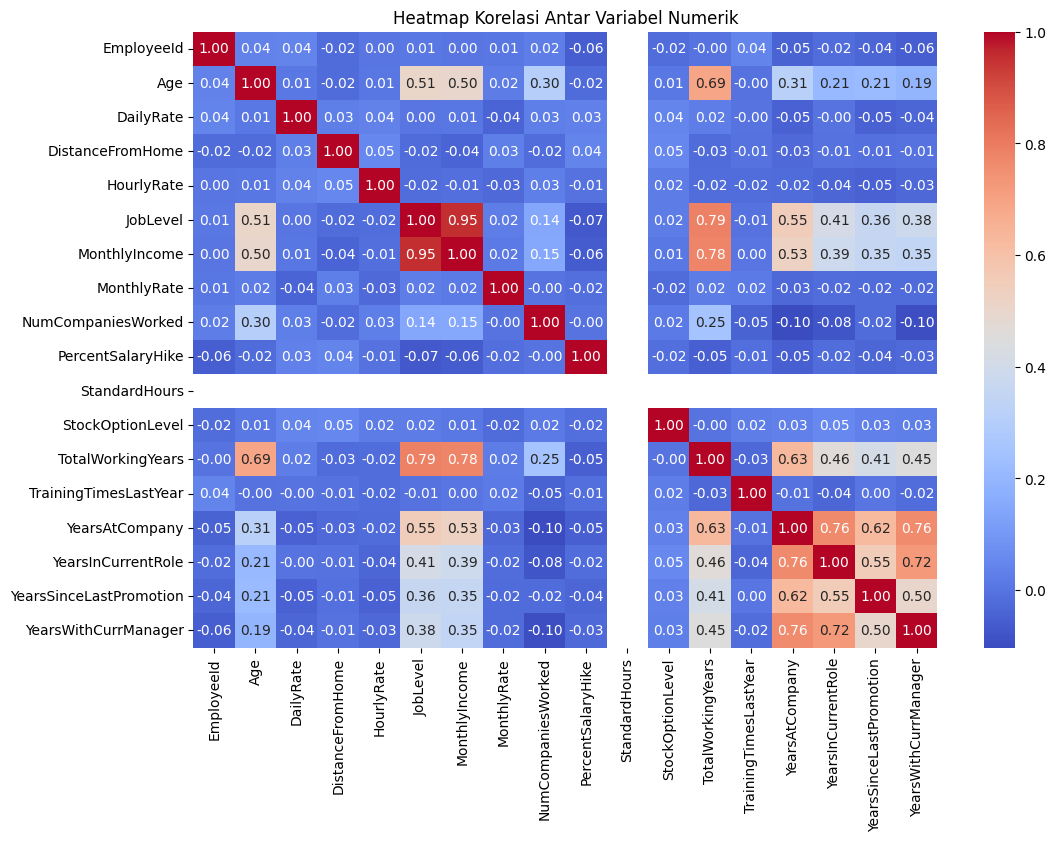

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

Fitur-fitur sudah divisualisasikan menggunakan heatmap. Diperoleh insight bahwa Fitur-fitur seperti `MonthlyIncome`, `TotalWorkingYears`, dan `YearsAtCompany` memiliki korelasi positif yang kuat (0.77)

### **Korelasi Variabel Kategorik**

In [34]:
# Cramér's V for Categorical-Categorical Correlation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_results = []
for i, feature1 in enumerate(categorical):
    for feature2 in categorical[i+1:]:
        confusion_matrix = pd.crosstab(df[feature1], df[feature2])
        cramers_v_score = cramers_v(confusion_matrix)
        cramers_v_results.append({
            "Feature 1": feature1,
            "Feature 2": feature2,
            "Cramér's V": cramers_v_score
        })

In [35]:
cramers_v_df = pd.DataFrame(cramers_v_results)
cramers_v_df

,Feature 1,Feature 2,Cramér's V
0,BusinessTravel,Department,Department Human Resources 0.212507 ...
1,BusinessTravel,Education,Education Bachelor 0.092793 Below Coll...
2,BusinessTravel,EducationField,EducationField Human Resources 0.530496 Li...
3,BusinessTravel,EnvironmentSatisfaction,EnvironmentSatisfaction High 0.078165 ...
4,BusinessTravel,Gender,Gender Female 0.108835 Male 0.091476 d...
...,...,...,...
86,OverTime,RelationshipSatisfaction,RelationshipSatisfaction High 0.090434...
87,OverTime,WorkLifeBalance,WorkLifeBalance High 0.079281 Low ...
88,PerformanceRating,RelationshipSatisfaction,RelationshipSatisfaction High 0.054364...
89,PerformanceRating,WorkLifeBalance,WorkLifeBalance High 0.102392 Low ...


**Hasil Cramér's V (Hubungan Antar Variabel Kategorikal)**

1. **Hubungan Tinggi (Cramér's V > 0.3)**:
   - `BusinessTravel` dan `JobRole`: Ada hubungan moderat antara frekuensi perjalanan bisnis dengan jenis pekerjaan.
   - `Gender` dan `JobRole`: Ada hubungan moderat antara gender dan jenis pekerjaan.

2. **Hubungan Rendah (Cramér's V < 0.3)**:
   - Sebagian besar hubungan antar variabel kategorikal bersifat lemah, seperti hubungan antara `BusinessTravel` dengan `MaritalStatus`.

# **Data Preprocessing**

Karena ada beberapa fitur yang tidak berkontribusi atau memengaruhi tingkat pengunduran diri dalam dataset ini, seperti EmployeeID, fitur-fitur ini perlu dihapus


In [36]:
df = df.drop('EmployeeId', axis=1)

## **Label Encoding**

Pada bagian ini akan dilakukan :
- Memisahkan fitur numerik dan kategorikal dalam dataset.
- Mengubah fitur kategorikal menjadi format numerik menggunakan Label Encoding agar bisa digunakan dalam model Machine Learning.

In [37]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

## **Data Normalization**

Bagian berikut digunakan untuk melakukan normalisasi atau penskalaan pada fitur numerik dalam dataset menggunakan teknik Min-Max Scaling. Penskalaan ini penting untuk memastikan bahwa fitur numerik memiliki skala yang seragam

In [38]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [39]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,1,0.0,0.000000,0.375,0.333333,1,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,0,0.0,1.000000,0.150,0.333333,2,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0.238095,1,0,0.904796,1,0.821429,2,5,2,1,...,1,0.0,0.000000,0.250,0.333333,2,0.250,0.388889,0.066667,0.529412
1465,0.476190,0,2,0.047244,1,0.000000,0,1,0,0,...,3,0.0,0.000000,0.250,0.666667,3,0.025,0.000000,0.000000,0.000000
1467,0.238095,1,2,0.989979,1,0.392857,1,1,0,0,...,3,0.0,0.000000,0.025,0.666667,2,0.025,0.055556,0.000000,0.000000
1468,0.523810,0,0,0.254832,1,0.535714,2,1,0,1,...,2,0.0,0.333333,0.150,0.000000,0,0.100,0.111111,0.000000,0.000000


### **Melakukan feature selection dengan RFE**

In [40]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [41]:
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X, y)

In [42]:
# Select top features
selected_features = X.columns[rfe_selector.support_]
X_selected = X[selected_features]

In [43]:
X_selected

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
1,0.452381,0.743737,0.357143,0.442857,0.198420,0.493395,0,0.285714,0.375,0.025
2,0.785714,0.874016,0.107143,0.057143,0.076461,0.330777,1,0.071429,0.450,0.250
3,0.571429,0.324266,0.892857,0.671429,0.659084,0.512748,0,0.214286,0.575,0.500
6,0.523810,0.731568,0.000000,0.385714,0.339547,0.448866,1,0.785714,0.150,0.100
7,0.880952,0.445956,0.035714,0.685714,0.992628,0.767115,1,0.142857,0.600,0.125
...,...,...,...,...,...,...,...,...,...,...
1464,0.238095,0.904796,0.821429,0.600000,0.406161,0.412006,0,0.071429,0.250,0.250
1465,0.476190,0.047244,0.000000,0.728571,0.360821,0.534150,1,0.214286,0.250,0.025
1467,0.238095,0.989979,0.392857,0.700000,0.079305,0.837623,1,0.000000,0.025,0.025
1468,0.523810,0.254832,0.535714,0.628571,0.133491,0.258502,0,0.357143,0.150,0.100


Terdapat 10 feature setelah dilakukan feature selection menggunakan RFE

## **Split Data**

In [74]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2,  random_state=2025, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (846, 10)
y_train : (846,)
X_test  : (212, 10)
y_test  : (212,)


Kode di atas digunakan untuk membagi dataset menjadi data pelatihan (train) dan data pengujian (test). Fungsi `train_test_split()` dari pustaka `sklearn.model_selection` digunakan untuk melakukan pemisahan ini, dengan parameter `test_size=0.2` yang berarti 20% dari data akan digunakan sebagai data pengujian dan 80% sisanya sebagai data pelatihan. Parameter `random_state=2025` memastikan bahwa pembagian data ini dapat direproduksi secara konsisten setiap kali kode dijalankan. Selain itu, dengan menggunakan `stratify=y`, pembagian data akan mempertahankan proporsi distribusi label pada variabel target `y` di kedua set data (train dan test), sehingga distribusi target tetap seimbang.

### **Lakukan SMOTE untuk menangani imbalance data**

In [75]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=2025)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **Modeling**

Pada tahap ini akan dilakukan pemodelan menggunakan berbagai model classifier

### **Logistic Regression**

In [77]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
y_pred_logistic = logistic_model.predict(X_test)

### **Random Forest**

In [79]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_rf = rf_model.predict(X_test)

### **XGboost Classifier**

In [81]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [82]:
y_pred_xgb = xgb_model.predict(X_test)

### **SVM**

In [83]:
svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train_res, y_train_res)

SVC(random_state=42)

In [84]:
y_pred_svm = svm_model.predict(X_test)

# **Evaluation**

In [85]:
# Metrics for Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_precision = precision_score(y_test, y_pred_logistic, average='weighted')
logistic_recall = recall_score(y_test, y_pred_logistic, average='weighted')
logistic_f1 = f1_score(y_test, y_pred_logistic, average='weighted')

In [86]:
# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [87]:
# Metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

In [88]:
# Metrics for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

In [89]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "Accuracy": [logistic_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    "Precision": [logistic_precision, rf_precision, xgb_precision, svm_precision],
    "Recall": [logistic_recall, rf_recall, xgb_recall, svm_recall],
    "F1-Score": [logistic_f1, rf_f1, xgb_f1, svm_f1]
})

In [90]:
model_comparison

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.716981,0.827239,0.716981,0.749378
1,Random Forest,0.849057,0.834426,0.849057,0.838969
2,XGBoost,0.825472,0.798041,0.825472,0.806074
3,SVM,0.735849,0.804687,0.735849,0.760356


In [91]:
# Detailed Classification Reports
print("\nClassification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logistic))

print("\nClassification Report: Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report: XGBoost")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report: SVM")
print(classification_report(y_test, y_pred_svm))


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       176
           1       0.34      0.72      0.46        36

    accuracy                           0.72       212
   macro avg       0.63      0.72      0.64       212
weighted avg       0.83      0.72      0.75       212


Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       176
           1       0.58      0.42      0.48        36

    accuracy                           0.85       212
   macro avg       0.73      0.68      0.70       212
weighted avg       0.83      0.85      0.84       212


Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       176
           1       0.48      0.28      0.35        36

    accuracy                           0.83       212
   macro avg  

Dari hasil pemodelan tersebut, terpilih model Random Forest Classifier sebagai model terbaik

### **Analisis Feature Importance Machine Learning**

In [92]:
# SHAP values untuk model RF
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [93]:
# Mengambil feature importance dari model Random Forest
feature_importances = rf_model.feature_importances_

In [94]:
# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

<ipython-input-95-774498014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


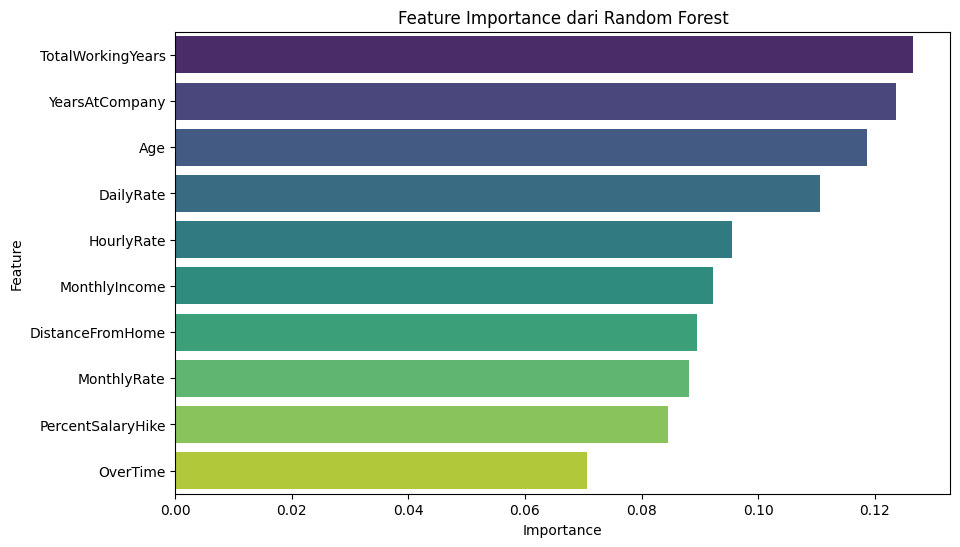

In [95]:
# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Dari analisis feature importance tersebut, terlihat bahwa 5 variabel yang paling berpengaruh adalah TotalWorkingYears, YearsAtCompany, Age, DailyRate, dan HourlyRate

# **Conclusion**

Proyek ini bertujuan untuk memahami faktor-faktor yang memengaruhi tingkat **attrition** (keluar) karyawan di perusahaan **Jaya Jaya Maju** dan membangun model prediktif untuk mengidentifikasi karyawan dengan risiko keluar tinggi. Berikut adalah temuan utama dan insight yang diperoleh:

#### **1. Faktor-Faktor Penyebab Attrition**
Berdasarkan analisis data dan model prediktif, berikut adalah faktor utama yang memengaruhi attrition:
1. **OverTime**:
   - Karyawan yang sering lembur (**OverTime = Yes**) memiliki risiko keluar yang jauh lebih tinggi dibandingkan yang tidak lembur.
   - Fitur ini adalah prediktor terkuat dalam model prediktif.
2. **MonthlyIncome**:
   - Pendapatan bulanan yang lebih rendah meningkatkan risiko keluar karyawan.
   - Fitur ini mencerminkan pentingnya kepuasan finansial dalam retensi karyawan.
3. **YearsAtCompany dan TotalWorkingYears**:
   - Masa kerja pendek baik di perusahaan maupun secara total adalah indikator risiko tinggi.
4. **Fitur Pendukung Lain**:
   - Fitur seperti **DistanceFromHome** dan **Age** memiliki kontribusi kecil, tetapi tetap relevan dalam memahami pola attrition.

#### **2. Model Prediktif Terbaik**
Model terbaik yang digunakan dalam proyek ini adalah **Random Forest**, dengan metrik performa sebagai berikut:
- **Accuracy**: 84.91%
- **Precision**: 83.44%
- **Recall**: 84.91%
- **F1-Score**: 83.89%
Model ini menunjukkan performa superior dibandingkan model lainnya seperti Logistic Regression, Random Forest, dan SVM.

#### **3. Feature Importance**
Dari analisis feature importance menggunakan model Random Forest :
- **TotalWorkingYears** adalah fitur dengan kontribusi terbesar terhadap prediksi.
- **YearsAtCompany** dan **Age** juga memiliki peran penting.

---

### **Jawaban terhadap Pertanyaan Bisnis**
1. **Apa faktor utama yang memengaruhi attrition?**
   - Faktor utama adalah **OverTime**, **MonthlyIncome**, dan **YearsAtCompany**.
2. **Bagaimana tingkat kepuasan karyawan memengaruhi attrition?**
   - Fitur seperti **JobSatisfaction** tidak signifikan dalam model prediktif, tetapi tetap relevan secara deskriptif.
3. **Apa pola perilaku karyawan dengan risiko keluar tinggi?**
   - Karyawan yang lembur berlebihan, memiliki pendapatan rendah, dan masa kerja pendek cenderung memiliki risiko tinggi.
4. **Apakah kita memiliki alat bantu untuk memantau attrition?**
   - Model prediktif dan visualisasi hasil dapat digunakan untuk membangun dashboard interaktif untuk monitoring risiko.

---

### **Karakteristik Umum Karyawan yang Melakukan Attrition**
Berdasarkan analisis data, berikut adalah karakteristik umum karyawan yang melakukan attrition:
1. **Demografis**:
  - **Usia**: Rata-rata usia karyawan yang keluar adalah 30-an tahun.
  - **Jenis Kelamin**: Mayoritas adalah pria (Male).
  - **Status Pernikahan**: Sebagian besar karyawan yang keluar adalah Single, diikuti oleh Married.
2. **Pekerjaan dan Departemen**:
  - **Peran Kerja**: Posisi yang paling sering melakukan attrition adalah Laboratory Technician.
  - **Departemen**: Departemen **Research & Development** memiliki tingkat attrition tertinggi.
3. **Faktor Finansial dan Beban Kerja**:
  - **Pendapatan**: Rata-rata pendapatan bulanan karyawan yang keluar adalah 4,872.
  - **Lembur (OverTime)**: Sebagian besar karyawan yang keluar bekerja lembur secara signifikan.
4. **Kepuasan dan Keseimbangan**:
  - **Kepuasan Kerja**: Rata-rata tingkat kepuasan kerja adalah **2.5** (Medium).
  - **Keseimbangan Kerja-Hidup**: Rata-rata berada di tingkat **2.67** (Moderate).
5. **Masa Kerja**:
  - **Masa Kerja di Perusahaan**: Rata-rata masa kerja adalah **5 tahun**, dengan beberapa karyawan memiliki masa kerja sangat panjang hingga 40 tahun.

---

### **Rekomendasi Action Items untuk Perusahaan**
1. **Kurangi Lembur Berlebihan**:
   - Berikan program kerja fleksibel untuk meningkatkan keseimbangan kerja-hidup.
2. **Kaji Skala Gaji**:
   - Sesuaikan gaji karyawan agar kompetitif di pasar dan berikan insentif tambahan.
3. **Perkuat Retensi Karyawan Baru**:
   - Implementasikan program onboarding dan mentoring untuk karyawan dengan masa kerja pendek.
4. Mengidentifikasi karyawan dengan YearsAtCompany dan TotalWorkingYears yang pendek, lalu memberikan perhatian khusus terhadap pengembangan karier dan kepuasan mereka.
5. Menciptakan lingkungan kerja yang lebih inklusif dan mendukung bagi karyawan dari berbagai kelompok usia.
6. **Gunakan Model Prediktif**:
   - Integrasikan model Random Forest untuk memonitor risiko secara real-time melalui dashboard HR.


# **Model Export**

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [97]:
joblib.dump(rf_model, '/content/drive/MyDrive/Laskar AI/Submission Penerapan Data Science 1/rf_model.joblib')

['/content/drive/MyDrive/Laskar AI/Submission Penerapan Data Science 1/rf_model.joblib']